# K-means Algorithm

This notebook is an introduction to one of the more widely used clustering algorithms for unsupervised learning: the K-means algorithm.

In a nutshell, the K-means algorithm is as follows:

    1) Randomly Initialize k centroids

    2) Assign each data point to 1 centroid
    
    3) Compute the mean of all data points for each centroid

    4) Move the centroid to the location of the mean

    5) Return to step 2 until stop contition is met

If that doesn't make sense right now, hopefully the examples shown below will make it clear.

### part I: 
The first part of this code will go through a simple example of solving a 2-cluster problem.
### part II:
The next part will generalize slightly and move to a 3-cluster problem, highlighting how K-means can get stuck in local minima. 
### part III:
Finally, at the end is just a slight different way to visualize how the process of K-means, binning a continuous distribution.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import numpy as np

# Part I: Simple example of K-means with 2 clusters.

Let me start be generating some fake data.

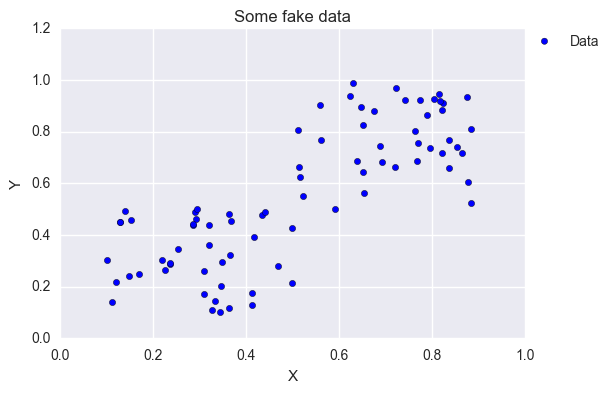

In [2]:
n=40
df=pd.DataFrame()
df['X']=np.concatenate((np.random.uniform(.1, .51, size=n),np.random.uniform(.51, .9, size=n)))
df['Y']=np.concatenate((np.random.uniform(.1, .5, size=n),np.random.uniform(.5, 1.0, size=n)))
plt.scatter(df['X'],df['Y'],label='Data');
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
plt.title('Some fake data');
plt.xlabel('X');
plt.ylabel('Y');

## 1) Randomly Initialize k centroids

In this example, I'm going to find 2 clusters. 

The first thing I'll do is initialize 2 centroids (centroid==center of a cluster). They need to be somewhere in the space of my data. A very easy way to do this is to use randomly chosen data points to define the inital locations of the centroids.

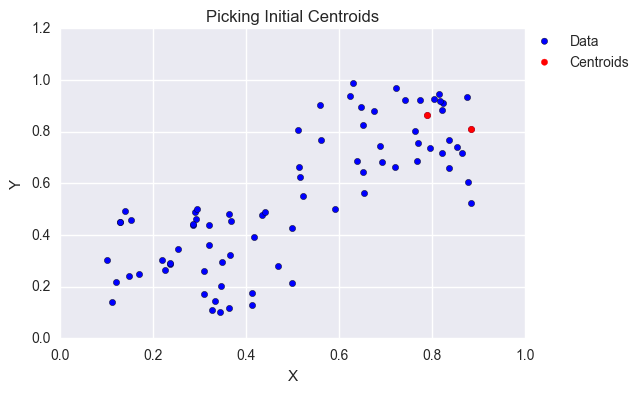

In [5]:
centroids=pd.DataFrame()
ind=np.random.choice(df.index,2,replace=False)
centroids.loc[0,'X']=df.loc[ind[0],'X']
centroids.loc[0,'Y']=df.loc[ind[0],'Y']
centroids.loc[1,'X']=df.loc[ind[1],'X']
centroids.loc[1,'Y']=df.loc[ind[1],'Y']
plt.scatter(df['X'],df['Y'],label='Data')
plt.scatter(centroids['X'],centroids['Y'],color='r',label='Centroids')
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
plt.title('Picking Initial Centroids');
plt.xlabel('X');
plt.ylabel('Y');

Above I have the 2 centroids marked in red. They are located at 2 randomly chosen data points. However, to make the process of K-means more clear, I re-ran that random initialization until the 2 centroids were located close to one another.

## 2) Assign each data point to 1 centroid

Next, I'll determine which centroid is closer to each point. In the code below, the first for-loop calculates the distance between each point and a centroid. In the 2nd loop, I find the points closest to a given centroid. In the 3rd for-loop, I plot data points associated with a given centroid as a unique color. Finally, I add the centroids to the plot.

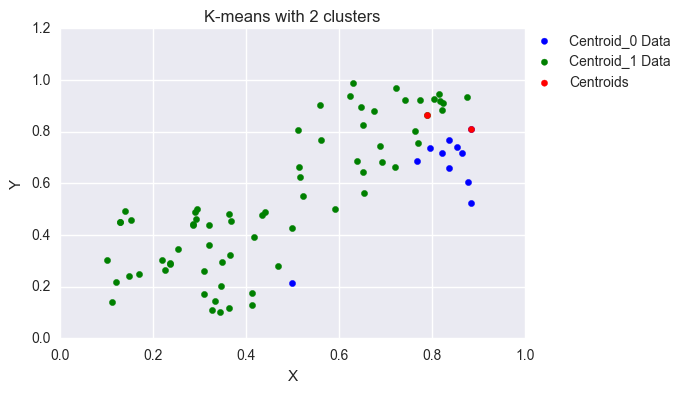

In [6]:
df.loc[:,'Cent']=0;
color=['b','g'];
for x in range(0,len(centroids)):
    df.loc[:,'centroid_%s'%(x)]=(df.loc[:,'X']-centroids.loc[x,'X'])**2+(df.loc[:,'Y']-centroids.loc[x,'Y'])**2
for x in range(0,len(centroids)):
    df.loc[df.loc[:,'centroid_%s'%(x)]==df.iloc[:,3:].min(axis=1),'Cent']=x
for x in range(0,len(centroids)):
    plt.scatter(df.loc[df.loc[:,'Cent']==x,'X'],df.loc[df.loc[:,'Cent']==x,'Y'],
                color=color[x],label='Centroid_%s Data'%(x))
plt.scatter(centroids['X'],centroids['Y'],color='r',label='Centroids')
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
plt.title('K-means with 2 clusters');
plt.xlabel('X');
plt.ylabel('Y');
plt.show()

## 3) Compute the mean of all data points for each centroid and
## 4) Move the centroid to the location of the mean

The first two lines of code below change the location of each centroid. The mean location of the data points associated with a given centroid is used to define the new location of that centroid. The rest of the code is just a repeat of step 2, re-grouping the data around the newly located centroids.

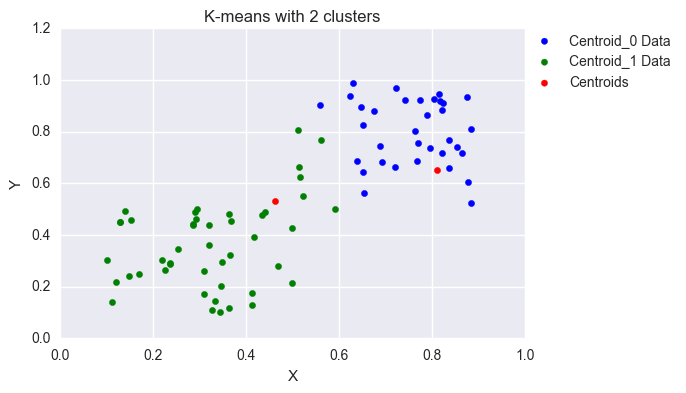

In [7]:
centroids.loc[0,['X','Y']]=df.loc[df.loc[:,'Cent']==0,['X','Y']].sum()/len(df.loc[df.loc[:,'Cent']==0,['X','Y']])
centroids.loc[1,['X','Y']]=df.loc[df.loc[:,'Cent']==1,['X','Y']].sum()/len(df.loc[df.loc[:,'Cent']==1,['X','Y']])

color=['b','g'];
for x in range(0,len(centroids)):
    df.loc[:,'centroid_%s'%(x)]=(df.loc[:,'X']-centroids.loc[x,'X'])**2+(df.loc[:,'Y']-centroids.loc[x,'Y'])**2
for x in range(0,len(centroids)):
    df.loc[df.loc[:,'centroid_%s'%(x)]==df.iloc[:,3:].min(axis=1),'Cent']=x
for x in range(0,len(centroids)):
    plt.scatter(df.loc[df.loc[:,'Cent']==x,'X'],df.loc[df.loc[:,'Cent']==x,'Y'],
                color=color[x],label='Centroid_%s Data'%(x))
plt.scatter(centroids['X'],centroids['Y'],color='r',label='Centroids')
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
plt.title('K-means with 2 clusters');
plt.xlabel('X');
plt.ylabel('Y');
plt.show()

## 5) Return to step 2 until stop contition is met 

To make this run automatically, I'll throw it into another for-loop and let it run till the centroids stop moving.

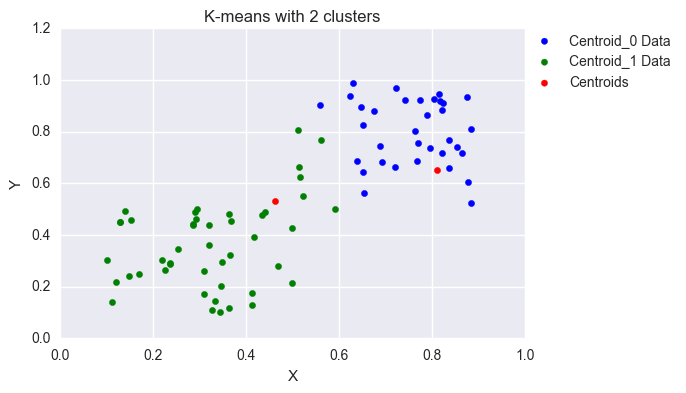

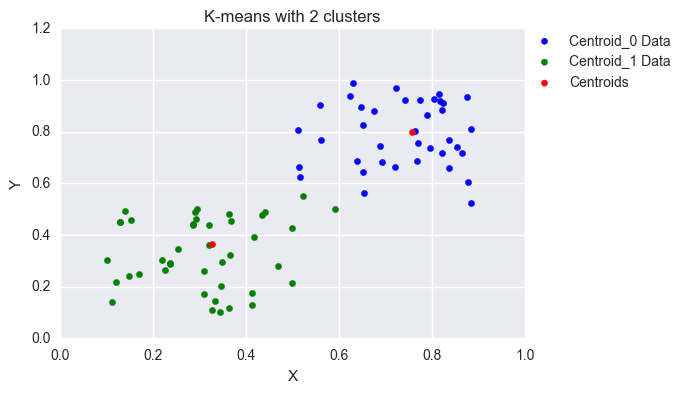

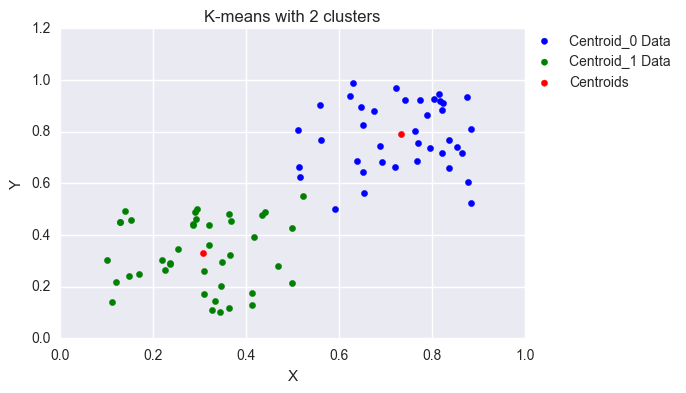

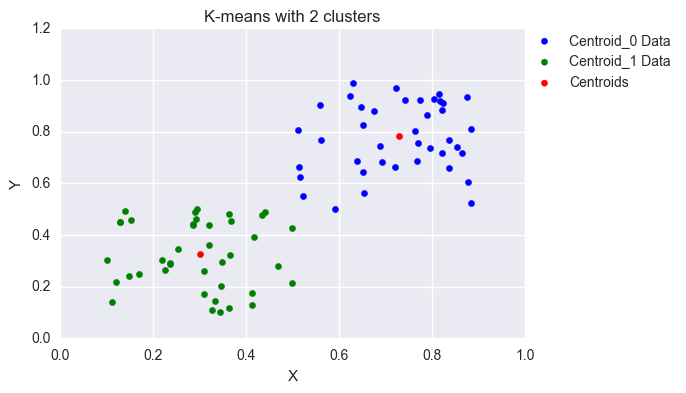

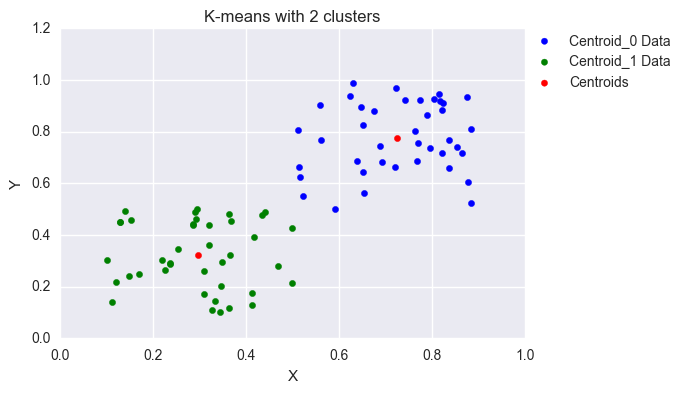

In [8]:
for x in range(0,25):
    df.loc[:,'Cent']=0;
    color=['b','g'];
    for x in range(0,len(centroids)):
        df.loc[:,'centroid_%s'%(x)]=(df.loc[:,'X']-centroids.loc[x,'X'])**2+(df.loc[:,'Y']-centroids.loc[x,'Y'])**2
    for x in range(0,len(centroids)):
        df.loc[df.loc[:,'centroid_%s'%(x)]==df.iloc[:,3:].min(axis=1),'Cent']=x
    for x in range(0,len(centroids)):
        plt.scatter(df.loc[df.loc[:,'Cent']==x,'X'],df.loc[df.loc[:,'Cent']==x,'Y'],
                    color=color[x],label='Centroid_%s Data'%(x))
    plt.scatter(centroids['X'],centroids['Y'],color='r',label='Centroids')
    plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
    plt.title('K-means with 2 clusters');
    plt.xlabel('X');
    plt.ylabel('Y');
    plt.show()
    
    #break condition
    if (np.sum(centroids.loc[0,['X','Y']])==(
    np.sum(df.loc[df.loc[:,'Cent']==0,['X','Y']].sum()/len(df.loc[df.loc[:,'Cent']==0,['X','Y']]))))&(
    np.sum(centroids.loc[1,['X','Y']])==(
    np.sum(df.loc[df.loc[:,'Cent']==1,['X','Y']].sum()/len(df.loc[df.loc[:,'Cent']==1,['X','Y']])))):
        break
    
    centroids.loc[0,['X','Y']]=df.loc[df.loc[:,'Cent']==0,['X','Y']].sum()/len(df.loc[df.loc[:,'Cent']==0,['X','Y']])
    centroids.loc[1,['X','Y']]=df.loc[df.loc[:,'Cent']==1,['X','Y']].sum()/len(df.loc[df.loc[:,'Cent']==1,['X','Y']])

# Part II: Watch out for local minima.

K-means can easily get trapped in local minimums, so it's advised to run a script many times with randomized intial centroids and pick the best one (by some metric).

As an example, I'll run K-means twice on some fake data with 3 clusters. With different initial locations of the centroids, the clusters the algorithm finds are quite different.

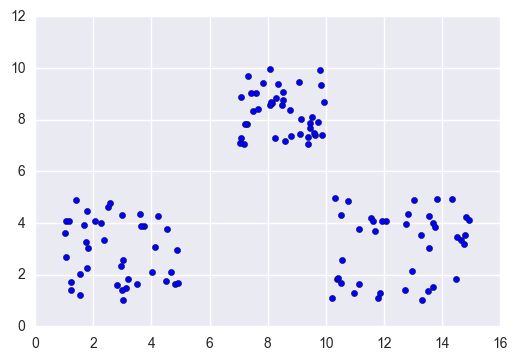

In [9]:
n=40
df=pd.DataFrame()
df['X']=np.concatenate((np.random.uniform(1, 5, size=n),
                        np.random.uniform(7, 10, size=n),
                        np.random.uniform(10, 15, size=n)))
df['Y']=np.concatenate((np.random.uniform(1, 5, size=n),
                        np.random.uniform(7, 10, size=n),
                        np.random.uniform(1, 5, size=n)))
plt.scatter(df['X'],df['Y'])

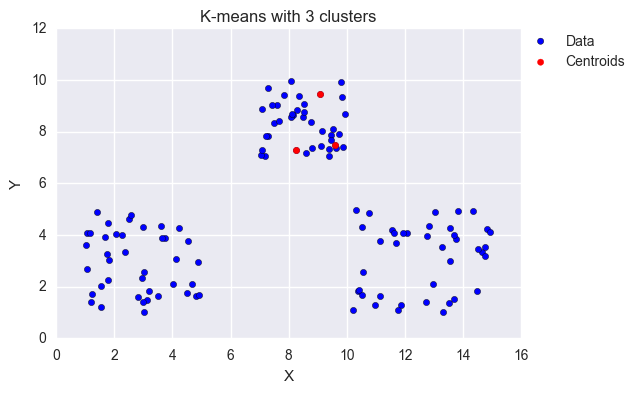

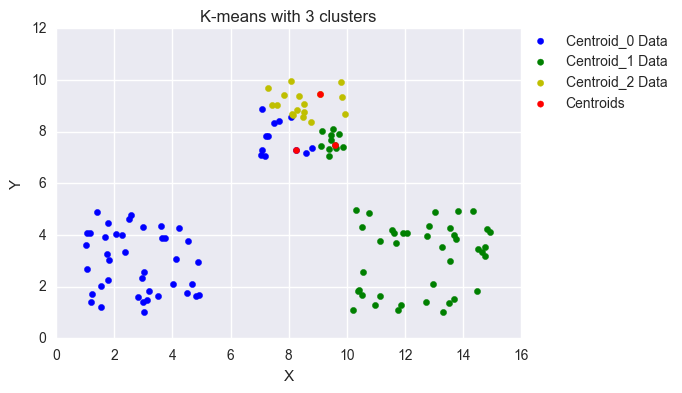

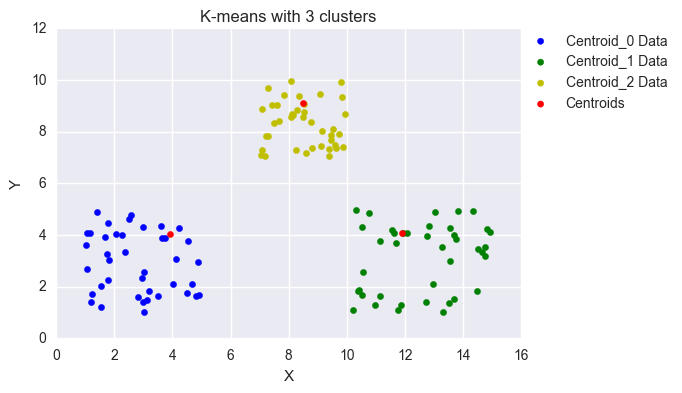

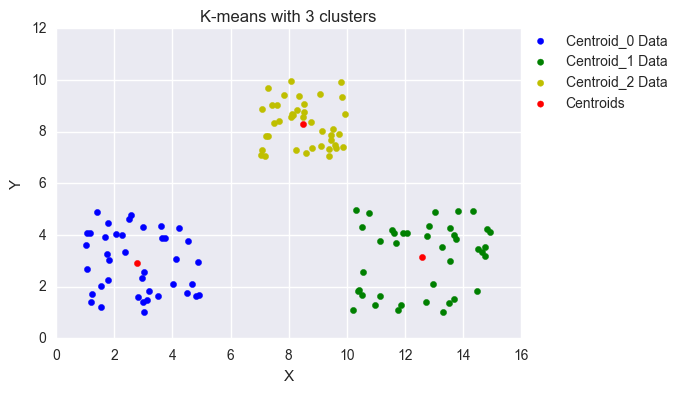

In [10]:
centroids=pd.DataFrame()
ind=np.random.choice(df.index,3,replace=False)
for x in range(0,len(ind)):
    centroids.loc[x,'X']=df.loc[ind[x],'X']
    centroids.loc[x,'Y']=df.loc[ind[x],'Y']
plt.scatter(df['X'],df['Y'],label='Data')
plt.scatter(centroids['X'],centroids['Y'],color='r',label='Centroids')
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
plt.title('K-means with 3 clusters');
plt.xlabel('X');
plt.ylabel('Y');
plt.show()

for y in range(0,20):
    df.loc[:,'Cent']=0;
    for x in range(0,len(centroids)):
        df.loc[:,'centroid_%s'%(x)]=(df.loc[:,'X']-centroids.loc[x,'X'])**2+(df.loc[:,'Y']-centroids.loc[x,'Y'])**2
    for x in range(0,len(centroids)):
        df.loc[df.loc[:,'centroid_%s'%(x)]==df.iloc[:,3:].min(axis=1),'Cent']=x

    plt.scatter(df.loc[df.loc[:,'Cent']==0,'X'],df.loc[df.loc[:,'Cent']==0,'Y'],color='b',label='Centroid_0 Data')
    plt.scatter(df.loc[df.loc[:,'Cent']==1,'X'],df.loc[df.loc[:,'Cent']==1,'Y'],color='g',label='Centroid_1 Data')
    plt.scatter(df.loc[df.loc[:,'Cent']==2,'X'],df.loc[df.loc[:,'Cent']==2,'Y'],color='y',label='Centroid_2 Data')
    plt.scatter(centroids['X'],centroids['Y'],color='r',label='Centroids')
    plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
    plt.title('K-means with 3 clusters');
    plt.xlabel('X');
    plt.ylabel('Y');
    plt.show()
    
    shift=0;
    for x in range(0,len(centroids)):
        shift=shift+(
            np.sum(df.loc[df.loc[:,'Cent']==x,['X','Y']].sum()/len(df.loc[df.loc[:,'Cent']==x,['X','Y']]))-
        centroids.loc[x,['X','Y']].sum())
    if shift==0:
        break

    for x in range(0,len(centroids)):
        centroids.loc[x,['X','Y']]=df.loc[df.loc[:,'Cent']==x,['X','Y']].sum()/len(df.loc[df.loc[:,'Cent']==x,['X','Y']])

Here's the same data, same script, just different initial conditions.

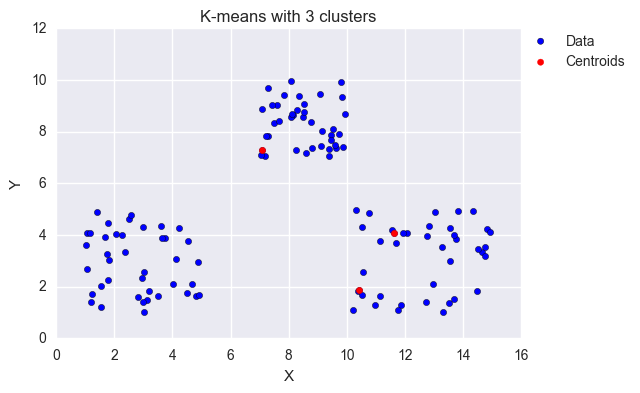

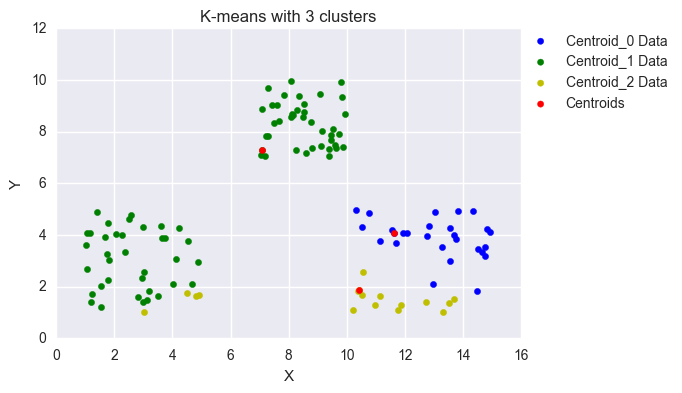

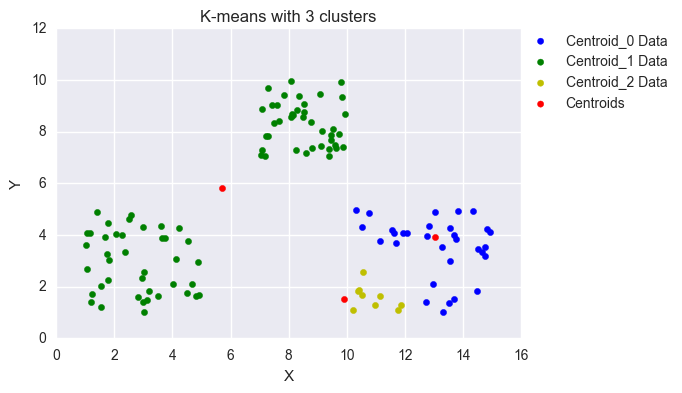

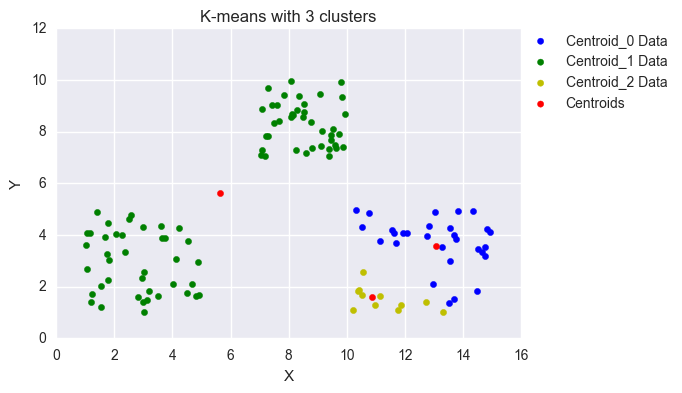

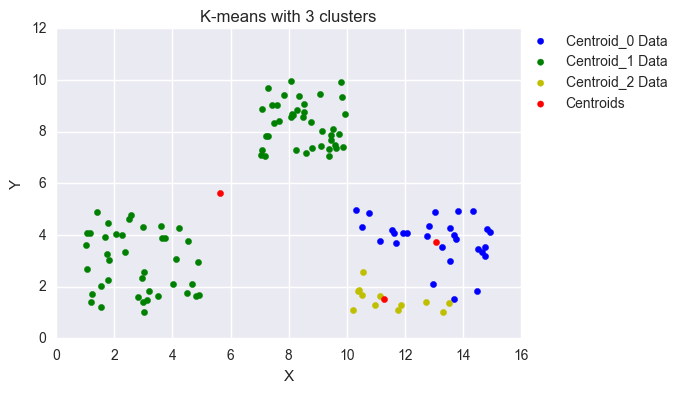

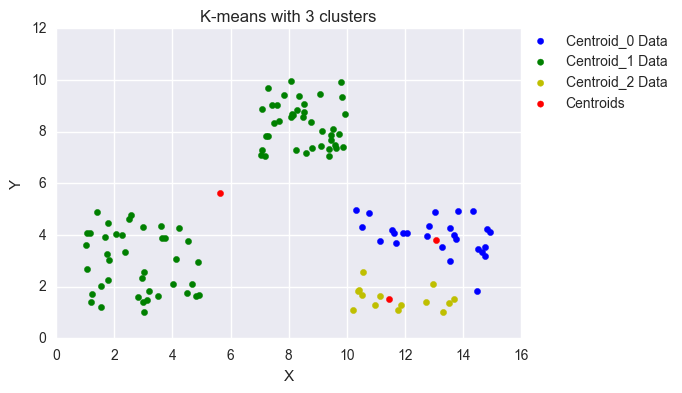

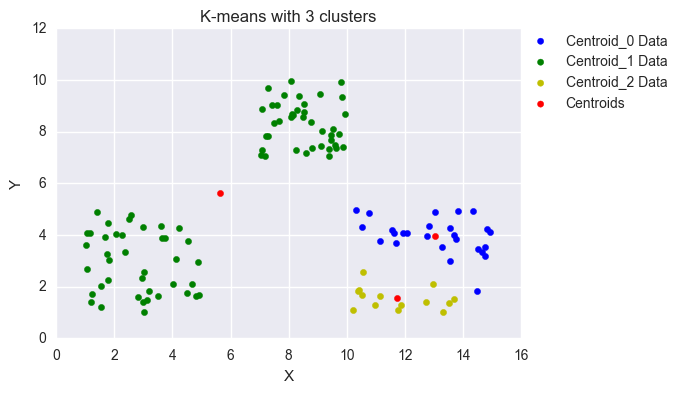

In [16]:
centroids=pd.DataFrame()
ind=np.random.choice(df.index,3,replace=False)
for x in range(0,len(ind)):
    centroids.loc[x,'X']=df.loc[ind[x],'X']
    centroids.loc[x,'Y']=df.loc[ind[x],'Y']
plt.scatter(df['X'],df['Y'],label='Data')
plt.scatter(centroids['X'],centroids['Y'],color='r',label='Centroids')
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
plt.title('K-means with 3 clusters');
plt.xlabel('X');
plt.ylabel('Y');
plt.show()

for y in range(0,20):
    df.loc[:,'Cent']=0;
    for x in range(0,len(centroids)):
        df.loc[:,'centroid_%s'%(x)]=(df.loc[:,'X']-centroids.loc[x,'X'])**2+(df.loc[:,'Y']-centroids.loc[x,'Y'])**2
    for x in range(0,len(centroids)):
        df.loc[df.loc[:,'centroid_%s'%(x)]==df.iloc[:,3:].min(axis=1),'Cent']=x

    plt.scatter(df.loc[df.loc[:,'Cent']==0,'X'],df.loc[df.loc[:,'Cent']==0,'Y'],color='b',label='Centroid_0 Data')
    plt.scatter(df.loc[df.loc[:,'Cent']==1,'X'],df.loc[df.loc[:,'Cent']==1,'Y'],color='g',label='Centroid_1 Data')
    plt.scatter(df.loc[df.loc[:,'Cent']==2,'X'],df.loc[df.loc[:,'Cent']==2,'Y'],color='y',label='Centroid_2 Data')
    plt.scatter(centroids['X'],centroids['Y'],color='r',label='Centroids')
    plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
    plt.title('K-means with 3 clusters');
    plt.xlabel('X');
    plt.ylabel('Y');
    plt.show()
    
    shift=0;
    for x in range(0,len(centroids)):
        shift=shift+(
            np.sum(df.loc[df.loc[:,'Cent']==x,['X','Y']].sum()/len(df.loc[df.loc[:,'Cent']==x,['X','Y']]))-
        centroids.loc[x,['X','Y']].sum())
    if shift==0:
        break

    for x in range(0,len(centroids)):
        centroids.loc[x,['X','Y']]=df.loc[df.loc[:,'Cent']==x,['X','Y']].sum()/len(df.loc[df.loc[:,'Cent']==x,['X','Y']])

This problem means a K-means algorithm should be run many times, with the final results of each run saved. Then, some metric can be used to pick the best result. In the case above, it could be something like "pick the result where the clusters have the closest variance" or "pick the result with the most equal distribution of datapoints between clusters."

# Part III: Clustering continuous variables and not creating so many plots.

K-means can do an o.k. job clustering continuous variables too. A common example would be measuring the torso length of a bunch of people, then dividing into groups (S,M,L) to pick the size to make a set of shirts.

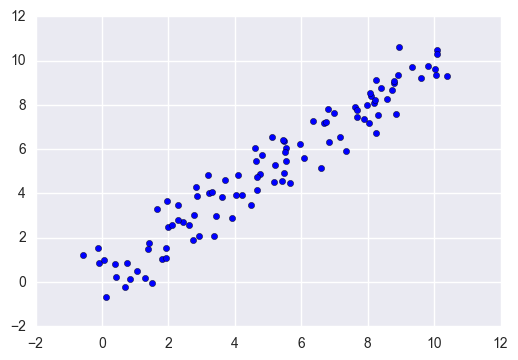

In [17]:
n=100
df=pd.DataFrame()
df['X']=np.multiply(list(range(n)),.1)+np.random.uniform(-1,1,size=n)
df['Y']=np.multiply(list(range(n)),.1)+np.random.uniform(-1,1,size=n)
plt.scatter(df['X'],df['Y'])

Instead of plotting each step of the K-means algorithm, I'll keep track of the locations of the centroids on each step, then plot the path each centroid took to reach its final destination in a final figure.

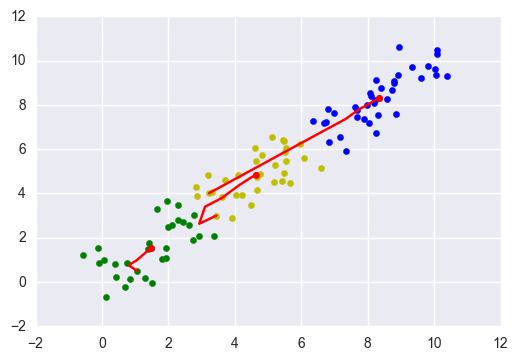

In [18]:
centroids=pd.DataFrame()
centroidHistX=pd.DataFrame()
centroidHistY=pd.DataFrame()
ind=np.random.choice(df.index,3,replace=False)
for x in range(0,len(ind)):
    centroids.loc[x,'X']=df.loc[ind[x],'X']
    centroids.loc[x,'Y']=df.loc[ind[x],'Y']

for y in range(0,20):
    a=centroids.loc[:,'X']
    b=centroids.loc[:,'Y']
    centroidHistX=centroidHistX.append(a)
    centroidHistY=centroidHistY.append(b)
    df.loc[:,'Cent']=0;
    for x in range(0,len(centroids)):
        df.loc[:,'centroid_%s'%(x)]=(df.loc[:,'X']-centroids.loc[x,'X'])**2+(df.loc[:,'Y']-centroids.loc[x,'Y'])**2
    for x in range(0,len(centroids)):
        df.loc[df.loc[:,'centroid_%s'%(x)]==df.iloc[:,3:].min(axis=1),'Cent']=x
    
    shift=0;
    for x in range(0,len(centroids)):
        shift=shift+(
            np.sum(df.loc[df.loc[:,'Cent']==x,['X','Y']].sum()/len(df.loc[df.loc[:,'Cent']==x,['X','Y']]))-
        centroids.loc[x,['X','Y']].sum())
    if shift==0:
        break

    for x in range(0,len(centroids)):
        centroids.loc[x,['X','Y']]=df.loc[df.loc[:,'Cent']==x,['X','Y']].sum()/len(df.loc[df.loc[:,'Cent']==x,['X','Y']])
        
color=['b','g','y']
for x in range(0,len(centroids)):
    plt.plot(centroidHistX[x],centroidHistY[x],color='r',label='centroid_%s'%(x))
    plt.scatter(df.loc[df.loc[:,'Cent']==x,'X'],df.loc[df.loc[:,'Cent']==x,'Y'],color=color[x],
                label='Centroid_%s Data'%(x))
    plt.scatter(centroids['X'],centroids['Y'],color='r')

Hopefully this has been an easy to follow notebook on how to implement K-means clustering.

Fin.